In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset= pd.read_csv('credit_card_dataset_DP.csv')
dataset

,amount,transaction_hour,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud,merchant_category_Electronics,merchant_category_Food,merchant_category_Grocery,merchant_category_Travel
0,84.47,22,0,0,66,3,40,0,1,0,0,0
1,541.82,3,1,0,87,1,64,0,0,0,0,1
2,237.01,17,0,0,49,1,61,0,0,0,1,0
3,164.33,4,0,1,72,3,34,0,0,0,1,0
4,30.53,15,0,0,79,0,44,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,350.91,22,0,0,99,4,37,0,0,1,0,0
9996,410.04,5,0,0,70,3,25,0,0,0,0,0
9997,527.75,21,0,0,44,2,45,0,1,0,0,0
9998,91.20,2,0,0,38,0,37,0,1,0,0,0


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Descriptive summary 
from Univariate import Univariate
quan,qual=Univariate.quanQual(dataset)
Univariate.Descriptive(quan,dataset)

,amount,transaction_hour,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud,merchant_category_Electronics,merchant_category_Food,merchant_category_Grocery,merchant_category_Travel
Mean,175.949849,11.5933,0.0978,0.0857,61.7989,2.0089,43.4687,0.0151,0.1923,0.2093,0.1944,0.199
Median,122.095,12.0,0.0,0.0,62.0,2.0,44.0,0.0,0.0,0.0,0.0,0.0
Mode,0.04,14,0,0,45,1,29,0,0,0,0,0
Q1:25%,50.905,6.0,0.0,0.0,43.0,1.0,30.0,0.0,0.0,0.0,0.0,0.0
Q2:50%,122.095,12.0,0.0,0.0,62.0,2.0,44.0,0.0,0.0,0.0,0.0,0.0
Q3:75%,242.48,18.0,0.0,0.0,80.0,3.0,56.0,0.0,0.0,0.0,0.0,0.0
99%,796.3233,23.0,1.0,1.0,99.0,6.0,69.0,1.0,1.0,1.0,1.0,1.0
Q4:100%,1471.04,23.0,1.0,1.0,99.0,9.0,69.0,1.0,1.0,1.0,1.0,1.0
IQR,191.575,12.0,0.0,0.0,37.0,2.0,26.0,0.0,0.0,0.0,0.0,0.0
1.5 rule,287.3625,18.0,0.0,0.0,55.5,3.0,39.0,0.0,0.0,0.0,0.0,0.0


## 1.What % of transactions are fraud vs legit?

In [5]:
dataset['is_fraud'].value_counts(normalize=True)*100

is_fraud
0    98.49
1     1.51
Name: proportion, dtype: float64

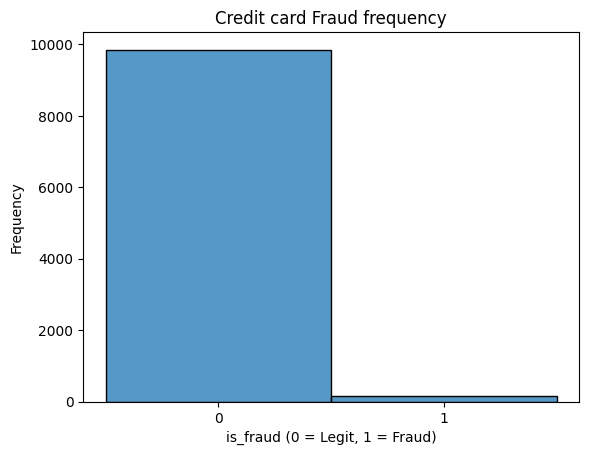

In [6]:
# histogram for fraud/ legit
sns.histplot(x='is_fraud', data = dataset, discrete=True)
plt.title('Credit card Fraud frequency')
plt.xlabel('is_fraud (0 = Legit, 1 = Fraud)')
plt.xticks([0, 1])
plt.ylabel('Frequency')
plt.show()

## 2.Do fraud transactions have higher amounts than legit ones?

In [7]:
dataset.groupby('is_fraud')['amount'].describe()

,count,mean,std,min,25%,50%,75%,max
is_fraud,,,,,,,,
0,9849.0,175.333015,173.986837,0.00,50.99,122.11,241.650,1471.04
1,151.0,216.182980,248.120467,0.11,41.53,118.94,341.695,1185.07


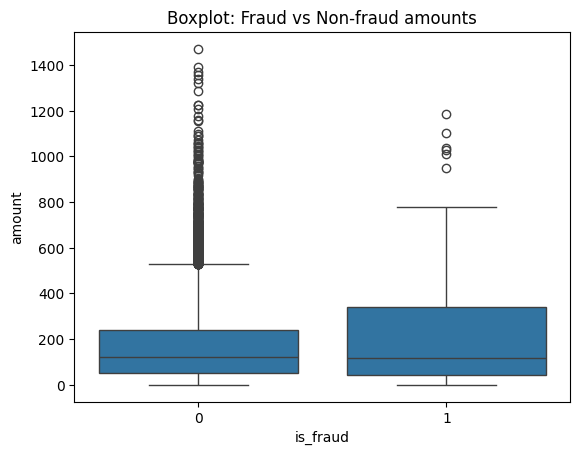

In [8]:
sns.boxplot(x='is_fraud',y='amount',data=dataset)
plt.title('Boxplot: Fraud vs Non-fraud amounts')
plt.show()

## 3.Which hours have the most fraud?


In [9]:
ct = pd.crosstab(dataset['transaction_hour'], dataset['is_fraud'])

ct['total_txn'] = ct[0] + ct[1]
ct['fraud_rate'] = ct[1] / ct['total_txn']

ct.sort_values('fraud_rate', ascending=False).head()

is_fraud,0,1,total_txn,fraud_rate
transaction_hour,,,,
0,380,37,417,0.088729
1,391,34,425,0.080000
3,398,27,425,0.063529
2,362,23,385,0.059740
19,417,4,421,0.009501


## 4.Are foreign transactions more likely to be fraud?

In [10]:
pd.crosstab(dataset['foreign_transaction'], dataset['is_fraud'], normalize='index')

is_fraud,0,1
foreign_transaction,,
0,0.992352,0.007648
1,0.916155,0.083845


## Ans: yes,foreign transaction is strongly relates to fraud. As the foregin transaction fraud has high percentage (8.38) than domestic transaction fraud percentage(0.76)

## 5.Does location mismatch strongly relate to fraud?

In [11]:
pd.crosstab(dataset['location_mismatch'], dataset['is_fraud'], normalize='index')

is_fraud,0,1
location_mismatch,,
0,0.991360,0.008640
1,0.915986,0.084014


## Ans: yes,location mismatch strongly relates to fraud. as location mismatch fraud has high percentage (8.40) than location matched fraud percentage(0.86)

## 6.Do fraud transactions have lower trust scores?

In [12]:
dataset.groupby('is_fraud')['device_trust_score'].describe()

,count,mean,std,min,25%,50%,75%,max
is_fraud,,,,,,,,
0,9849.0,62.165804,21.351099,25.0,44.0,62.0,80.0,99.0
1,151.0,37.867550,16.179277,25.0,28.5,32.0,38.0,99.0


## Ans: yes, fraud transaction has lower device trust score. As the device trust score of fraud and legit as 37.86 and 62.16 respectively. we can see the huge gap between them.

## 7.Do fraud transactions show higher velocity?

In [13]:
dataset.groupby('is_fraud')['velocity_last_24h'].describe()

,count,mean,std,min,25%,50%,75%,max
is_fraud,,,,,,,,
0,9849.0,1.990557,1.415366,0.0,1.0,2.0,3.0,9.0
1,151.0,3.205298,1.953861,0.0,2.0,3.0,5.0,7.0


## Ans: Fraud velocity has a higher rate comparing to the legit velocity. so yes,higher velocity shows the fraud transaction.

## 8.Are certain age groups more affected by fraud?

In [14]:
dataset.groupby('is_fraud')['cardholder_age'].describe()

,count,mean,std,min,25%,50%,75%,max
is_fraud,,,,,,,,
0,9849.0,43.469794,14.987218,18.0,30.0,44.0,56.0,69.0
1,151.0,43.397351,14.490953,18.0,31.5,44.0,55.5,69.0


## Ans: There is no evidence that any particular age group is more affected by fraud in this dataset. Fraud appears to be spread across all ages similarly.

## 9. Which merchant category has highest fraud rate?

In [15]:
cat_col= [col for col in dataset.columns if 'merchant_category_' in col]

fraud_by_cat = dataset.groupby('is_fraud')[cat_col].sum().T
fraud_by_cat['fraud_rate'] = fraud_by_cat[1] / (fraud_by_cat[0] + fraud_by_cat[1])
fraud_by_cat.sort_values('fraud_rate', ascending=False)

is_fraud,0,1,fraud_rate
merchant_category_Grocery,1905,39,0.020062
merchant_category_Food,2058,35,0.016722
merchant_category_Travel,1961,29,0.014573
merchant_category_Electronics,1899,24,0.012480


## Ans: Here we can clearly see that the fraud rate of grocery is high comparetively with other category.

## 10. Which numeric features correlate most with fraud?

In [16]:
corr_fraud=dataset.corr(numeric_only=True)['is_fraud'].sort_values(ascending =True)
corr_fraud

transaction_hour                -0.138665
device_trust_score              -0.137913
merchant_category_Electronics   -0.010481
merchant_category_Travel        -0.002155
cardholder_age                  -0.000590
merchant_category_Food           0.006845
merchant_category_Grocery        0.019987
amount                           0.028404
velocity_last_24h                0.103413
location_mismatch                0.173009
foreign_transaction              0.185597
is_fraud                         1.000000
Name: is_fraud, dtype: float64

## Ans: correlation shows the negative correlation and positive correlation between the features. here negative correlation means less impacts of fraud transaction. positive correlation features are high chance impacts by fraud transcation.  

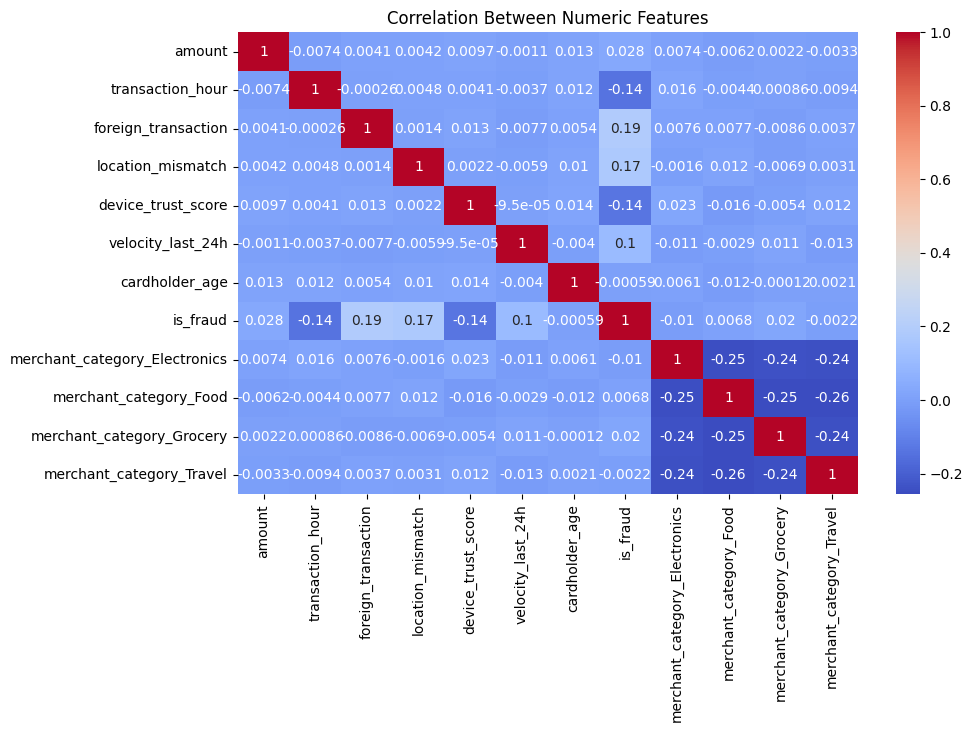

In [17]:
corr_matrix = dataset.corr(numeric_only=True)

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Between Numeric Features")
plt.show()